In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The aim of this project is to analyze frquently used positive and negative words in youtube. For this, a collection of data, which is already cleaned,  is gathered from a particular source and analysis is performed on that data. Some of the rows in this data set were corrupt and those lines are ignored using the second argument(error_bad_lines = False). Then, remaining dataset is imported.

In [2]:
videos = pd.read_csv("UScomments.csv",error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\chira\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
videos.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


#  Analysing Data

For the purpose of analysing the text based data, "textblob" is used. This particular module is useful for text-based data analysis. A class from textblob ,"TextBlob" has a method "sentiment" which analyze the sentiment of any sentence to find if that is positive or negative.

Then "polarity" method returns polarity if the sentiment. The return value is between -1 and +1 where -1 signifies completly negative word , 0 signifies somewhat neutral sentence and +1 signifies positive sentence. 

In the cell below, the said module is imported and each element form column "comment_text" from the dataset "UScomments.csv" is ran passed for sentiment analysis. Then, their polarity value is added in the data set.

In [4]:
from textblob import TextBlob

Executing the cell below may take a minute or two

In [5]:
polarity=[]
for i in videos["comment_text"]:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [6]:
videos["polarity"] = polarity


Now, The comments with polarity "1" is picked from our dataset and analysis is performed. For this, wordcloud, a python module to create wordcloud, is used. This module automatically sorts the frequently used words and make a wordcloud out of that.

In [7]:
positive_comments = videos[videos["polarity"] == 1]

"!pip install wordcloud" Run this if you are having trouble displaying image.

In [8]:
from wordcloud import WordCloud, STOPWORDS

Now, all positive comments are joined and wordcloud is generated form those comments.

In [9]:
total_positive_comments = " ".join(positive_comments["comment_text"])
len(total_positive_comments)
stopword = set(STOPWORDS)

Finally, the height and width of word cloud is defined and matplotlib is used to display that wordcloud.

(-0.5, 999.5, 499.5, -0.5)

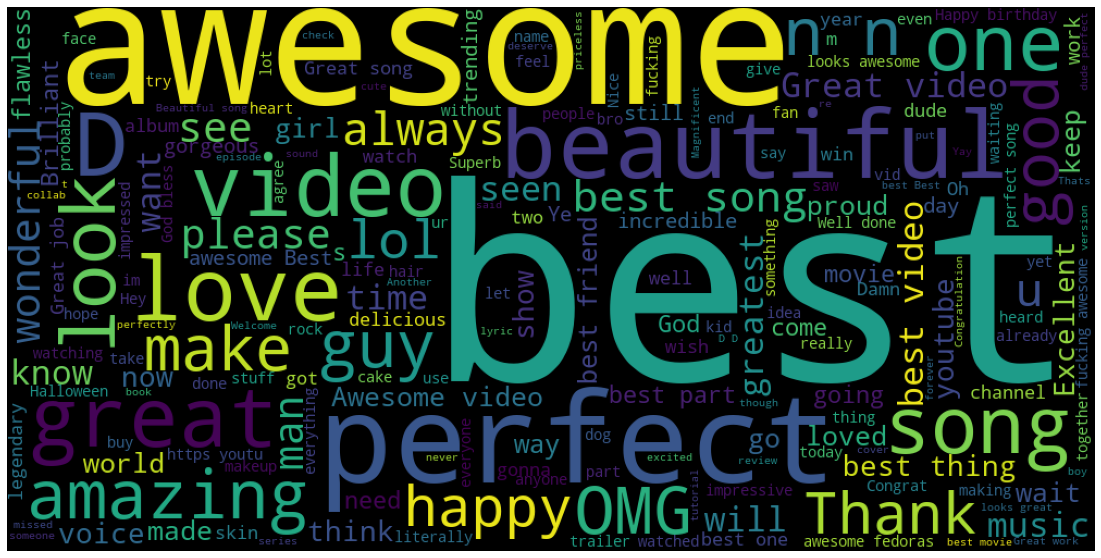

In [10]:
cloud = WordCloud(width=1000, height=500, stopwords=stopword).generate(total_positive_comments)
plt.figure(figsize=(20,10))
plt.imshow(cloud)
plt.axis("off")

We can see thar "best" and "awesome" are some of the most used positive words in youtube. Although, since the data was gathered from certain youtube channels, making a general assumption for overall youtube contents is not plausible.

Same Process is repeated for negative comments with polarity -1.

In [11]:
neg_comments = videos[videos.polarity == -1]
neg_comments.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [12]:
neg_reviews = neg_comments.comment_text
neg_review = " ".join(neg_reviews)

(-0.5, 999.5, 499.5, -0.5)

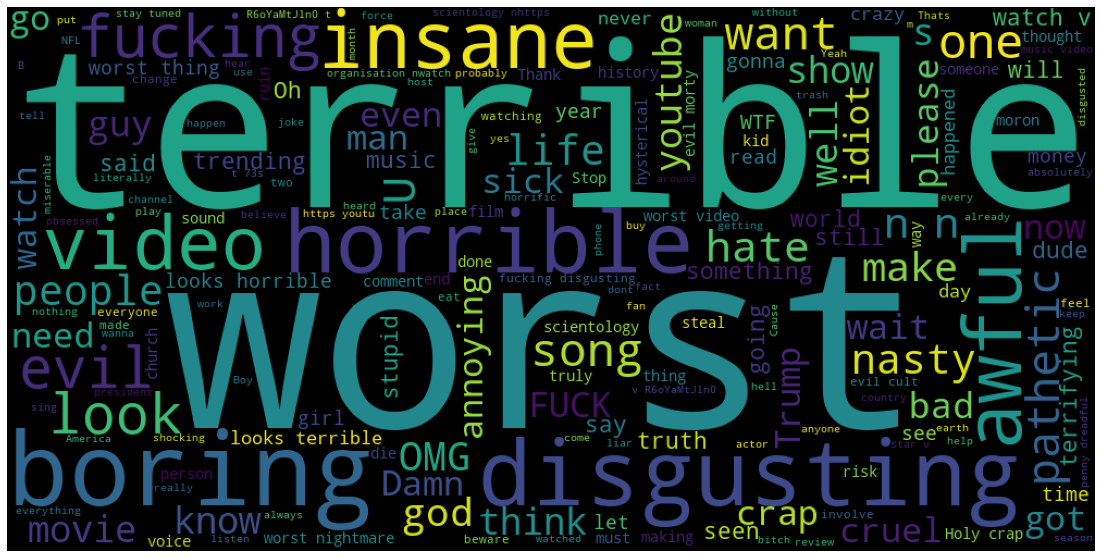

In [13]:
cloud1 = WordCloud(width=1000, height=500, stopwords=stopword).generate(neg_review)
plt.figure(figsize=(20,10))
plt.imshow(cloud1)
plt.axis("off")

On the otherhand, "terrible" and "Worst" are among the most used negative words in these youtube channels.

# Part 2: Tag and Trend analysis 

In this section, the tags and trends on youtube are analysed. To analyze tag, "USVideso.csv" is imported which contains information about tags ,likes, dislikes , views, etc of many popular videos of youtube. 

In [15]:
videos2 = pd.read_csv("USvideos.csv",error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [16]:
videos2.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


Firstly, all contents of tag collumn if our data is joined by " ". On doing so, we notice some special symbols(|) between words. This symbol may harm accuracy of our prediction which is the data needs to be cleaned. For this Regular Expression(re) is used.

In [24]:
tags = " ".join(videos2.tags)

In [25]:
videos2["tags"][0]

'logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life'

In [26]:
import re

Now, using Re's sub(substitite) method, we replace all the characters except alphabets with space. On doing so, existsing space between words are increased and to counter that, all excess space are removed using regular expression.

In [27]:
tags = re.sub("[^a-zA-Z ]"," ",tags)

In [33]:
tags = re.sub(" +", " ", tags)

Again, WordCloud is used which analyzes frequently used tags and creates a wordcloud.

(-0.5, 999.5, 499.5, -0.5)

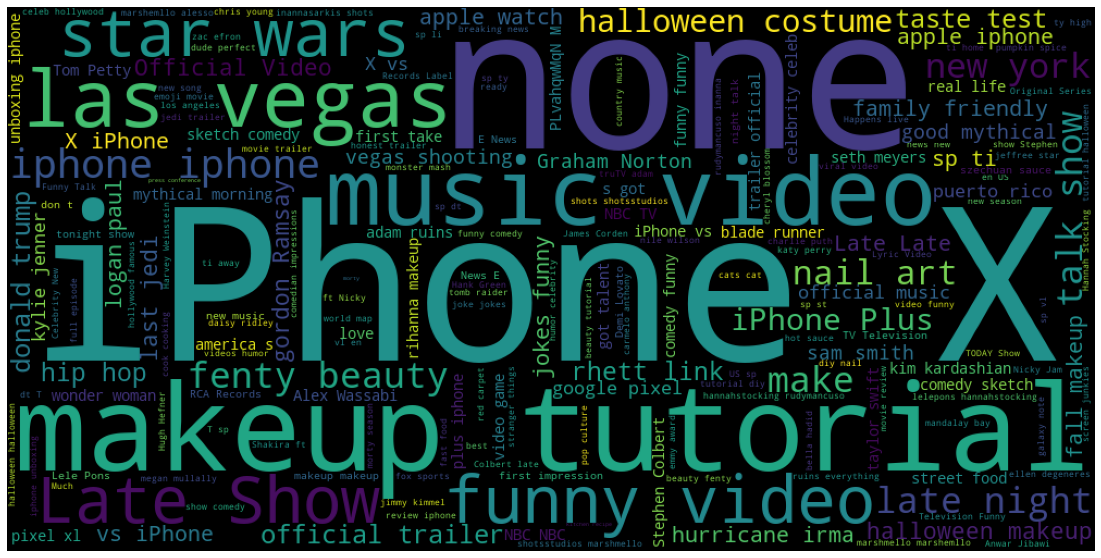

In [34]:
cloud2 = WordCloud(width=1000, height=500, stopwords=stopword).generate(tags)
plt.figure(figsize=(20,10))
plt.imshow(cloud2)
plt.axis("off")

# Analysis on Like, Dislike & Views

In this section, the likes, dislikes and views are analyzed. For the analysis, Seaborn is used.

Text(0.5, 1.0, 'Regression plot of Likes and Views')

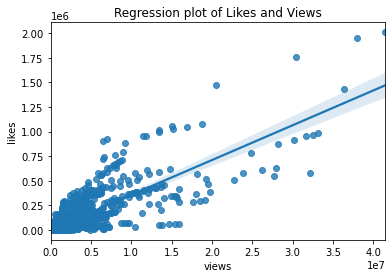

In [36]:
sns.regplot(x="views", y="likes",data=videos2)
plt.title("Regression plot of Likes and Views")

In the graph above, we can see a linear growth on likes and views. Looking at the graph above, we can conclude that like will increase with increase in views on the videos.

Text(0.5, 1.0, 'Regression Plot of Dislikes and Views')

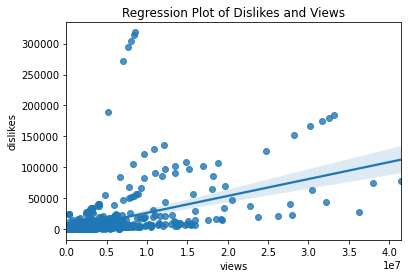

In [37]:
sns.regplot(x="views",y="dislikes",data=videos2)
plt.title("Regression Plot of Dislikes and Views")

Same analysis is performed in this part where dislikes and views are compared. We can notice somewhat growing trend here but their relation is not as clear as relation of views and likes. There are some videos here which have high dislikes wven with lesser views and less dislikes even with millions of views.

Here, we can conclude that number of likes in a video is likely to grow with views but number of dislikes is relatively uncertain. To validate this statement, a heatmapis drawn which looks closely at the corelation of views, likes and dislikes of videos.

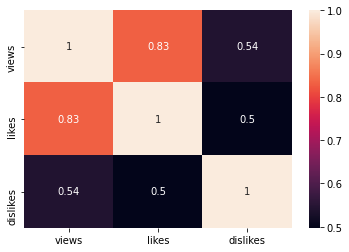

In [49]:
df_corr = videos2[["views","likes","dislikes"]]
sns.heatmap(df_corr.corr(),annot=True)

Here, we can see that likes and views are highly corelated where as views and dislikes are somewhat less corelated. This calidates our previous statement.